# Classification Report on Selected Models

This is using yellow brick's classification report on selected models from the best results of the file "Tree Classifier Exploration" where a large sample of the data was taken and numerous models were made from the sample.

Using data from team's ML Table 1.

In this file, we will use the full data as opposed to how we did it in the more exploratoiry file "Tree Classifier Exploration" as a sample of data.

In [1]:
#General imports
import pandas as pd
import boto3
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_columns', 200)
%matplotlib inline 

## Load the Data

In [2]:
#load in the csvs
#TODO For Team: enter the credentails below to run
S3_Key_id=''
S3_Secret_key=''

def pull_data(Key_id, Secret_key, file):
    """
    Function which CJ wrote to pull data from S3 
    """
    BUCKET_NAME = "gtown-wildfire-ds"
    OBJECT_KEY = file
    client = boto3.client(
        's3',
        aws_access_key_id= Key_id,
        aws_secret_access_key= Secret_key)
    obj = client.get_object(Bucket= BUCKET_NAME, Key= OBJECT_KEY) 
    file_df = pd.read_csv(obj['Body'])
    return (file_df)

#Pull in the firms and scan df
file = 'MLTable1.csv'
df = pull_data(S3_Key_id, S3_Secret_key, file)
df.head()

,Unnamed: 0,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,1,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
#unnamed seems to be a column brought in that we dont want. drop it. 
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(1396691, 37)

## ML Prep

In [5]:
#seperate data sets as labels and features
X = df.drop('FIRE_DETECTED', axis=1)
y = df['FIRE_DETECTED']

In [6]:
#train test splitting of data
#common syntax here is to use X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state is a random seed

In [7]:
#create our scalar to get optimized result
sc = StandardScaler() #runs the standard scalar with default settings. you can refine this, see docs
#transform the feature data by using the fit_transform 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test) 

## Classification Report

In [8]:
def run_model(model):
    """
    function to run a model on partial df and get the results
    """
    model.fit(X_train, y_train) #fits the model using training data
    pred = model.predict(X_test) #predict the test data now

In [9]:
def run_and_visualize(model):
    """
    function which runs the model on X_train and y_train and scores based on X_test, y_test 
    Displays results using yellowbricks classification report 
    """
    run_model(model)
    visualizer = ClassificationReport(
    model, 
    classes=['No_Fire', 'Fire'], 
    cmap="Reds", 
    support=True,
    size=(600, 360)
    )
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    print(str(model) + ':') #prints the model type
    visualizer.show() 

In [10]:
#list of models we want to try below
models = [
    DecisionTreeClassifier(splitter="random", criterion = "entropy", max_depth=1700),
    DecisionTreeClassifier(splitter="random", criterion = "entropy", max_depth=1500),
    DecisionTreeClassifier(splitter="random", criterion = "entropy", max_depth=70),
    DecisionTreeClassifier(splitter="random"),
    DecisionTreeClassifier(splitter="random", max_depth=1700),
    DecisionTreeClassifier()
]

DecisionTreeClassifier(criterion='entropy', max_depth=1700, splitter='random'):


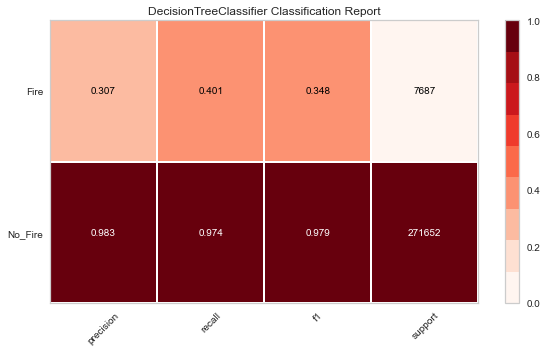

DecisionTreeClassifier(criterion='entropy', max_depth=1500, splitter='random'):


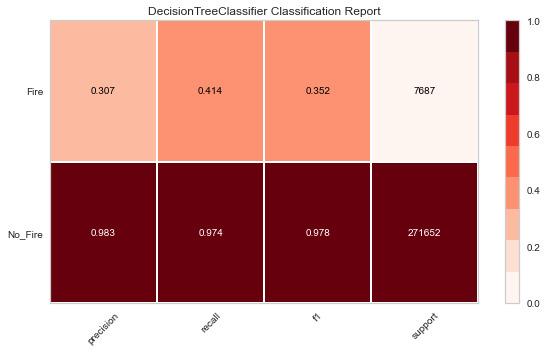

DecisionTreeClassifier(criterion='entropy', max_depth=70, splitter='random'):


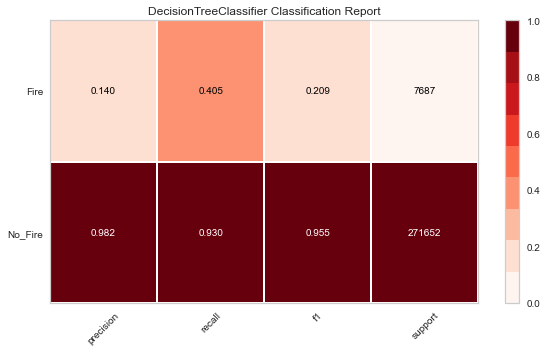

DecisionTreeClassifier(splitter='random'):


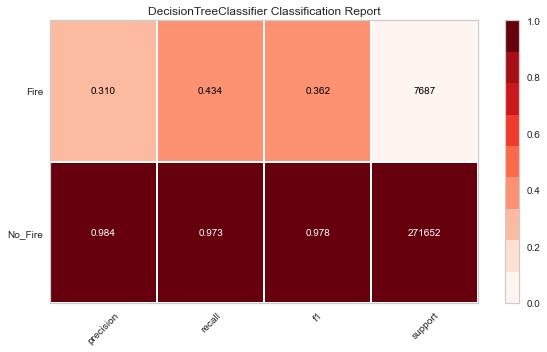

DecisionTreeClassifier(max_depth=1700, splitter='random'):


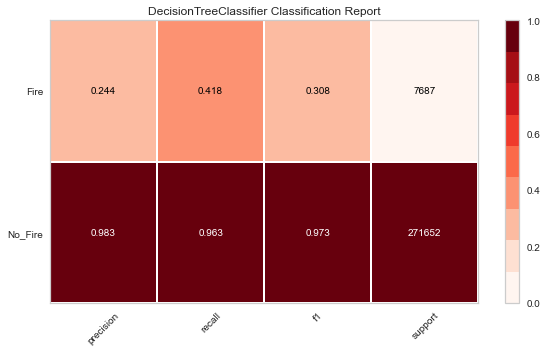

DecisionTreeClassifier():


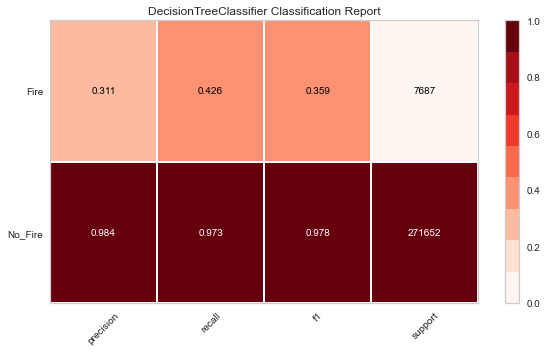

In [11]:
for model in models:
    run_and_visualize(model)

DecisionTreeClassifier(criterion='entropy', splitter='random'):


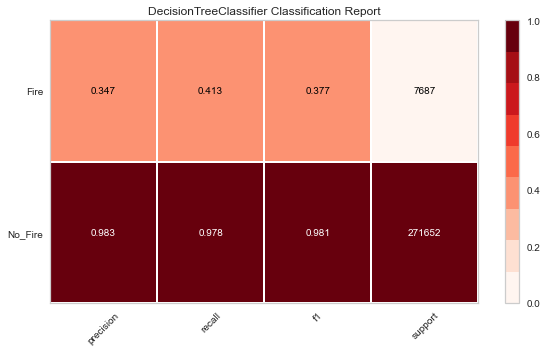

DecisionTreeClassifier(min_samples_split=3, splitter='random'):


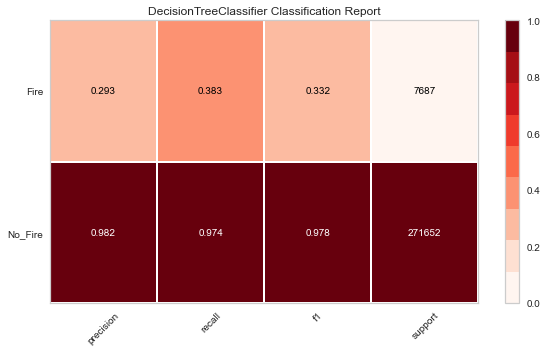

DecisionTreeClassifier(criterion='entropy', min_samples_split=3,
                       splitter='random'):


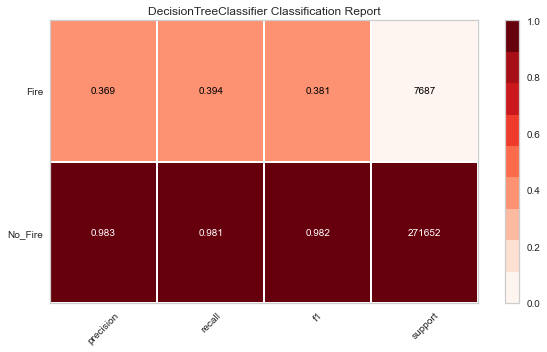

DecisionTreeClassifier(criterion='entropy', max_depth=40, splitter='random'):


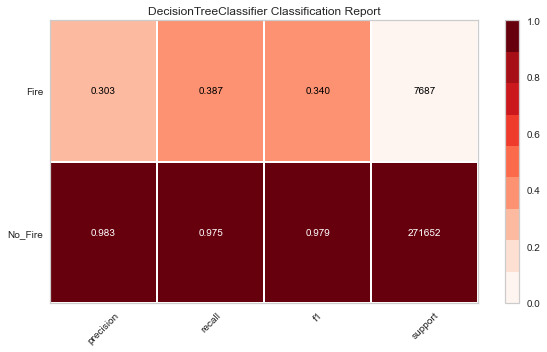

DecisionTreeClassifier(criterion='entropy', max_depth=1500):


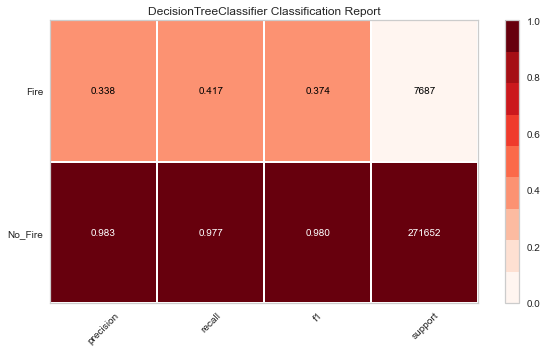

DecisionTreeClassifier(max_depth=1700, splitter='random'):


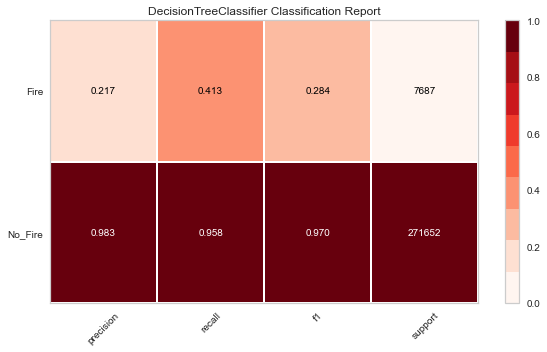

In [12]:
#run a few more models 
models2 = [
    DecisionTreeClassifier(splitter="random", criterion = "entropy"),
    DecisionTreeClassifier(splitter="random", min_samples_split=3),
    DecisionTreeClassifier(splitter="random", criterion = "entropy", min_samples_split=3),
    DecisionTreeClassifier(splitter="random", criterion = "entropy", max_depth=40),
    DecisionTreeClassifier(criterion = "entropy", max_depth=1500),
    DecisionTreeClassifier(splitter="random", max_depth=1700)
]

for model in models2:
    run_and_visualize(model)